Here we are looking at 
1. the run wherein I fixed the carbon store dynamics and have a longer minimum leafon period.  
vs
2. The same thing, PLUS a zeroing out of the 'dayssincecleafon' counter at leaf-on (to prevent immediate leaf drop).
I added the code here:

https://github.com/NGEET/fates/blob/393b905468d93786735a340356d48babc3769988/biogeochem/EDPhysiologyMod.F90#L726

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Then we choose which simulations to use...

In [2]:
runs = ['clm5-fates_ryanfix_CLD_daily', 'clm5-fates_rosiefix_CLD_daily','clm5-fates_rosiefix_counter_CLD_daily','clm5-fates_rosiefix_phenmin_counter_CLD_daily']

Then we make an ugly list of variables to ignore (the files being large)

(n.b. does anyone know how to make this inclusive rather than exclusive? 
Reading in >10 years of 4x5 output takes nearly forever)

In [3]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

In [4]:
run = runs[2]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + '/' + run + '/run/' 
print(arc)
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds0 = xr.open_mfdataset([f2,f3], drop_variables=drop, decode_times=False)
#ds_2003 = xr.open_mfdataset(arc + '2003*', drop_variables=drop, decode_times=False)
arc = scratch + 'archive/' + run + '/lnd/hist/'+ run + '.clm2.h0.' 
#arc = scratch + '/' + run + '/run/' + run + '.clm2.h0.' 
#ds0= xr.open_mfdataset(arc + '2002*', drop_variables=drop, decode_times=False)


/glade/scratch/rfisher/archive/clm5-fates_rosiefix_counter_CLD_daily/lnd/hist/


In [5]:
run = runs[3]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/'
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds1 = xr.open_mfdataset([f2,f3], drop_variables=drop, decode_times=False)

arc = scratch + 'archive/' + run + '/lnd/hist/'+ run + '.clm2.h0.' 
#arc = scratch + '/' + run + '/run/' + run + '.clm2.h0.' 
print(arc)
#ds1 = xr.open_mfdataset(arc + '2002*', drop_variables=drop, decode_times=False)
#ds_2003 = xr.open_mfdataset(arc + '2003*', drop_variables=drop, decode_times=False)

/glade/scratch/rfisher/archive/clm5-fates_rosiefix_phenmin_counter_CLD_daily/lnd/hist/clm5-fates_rosiefix_phenmin_counter_CLD_daily.clm2.h0.


In [6]:
#plotting years
yr1=1
yr2=3

Now have a look at the global LAI plot... 

<xarray.DataArray 'TLAI' (time: 730, lat: 46, lon: 72)>
dask.array<shape=(730, 46, 72), dtype=float32, chunksize=(365, 46, 72)>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * time     (time) float64 365.0 366.0 367.0 ... 1.092e+03 1.093e+03 1.094e+03
Attributes:
    long_name:     total projected leaf area index
    units:         none
    cell_methods:  time: mean


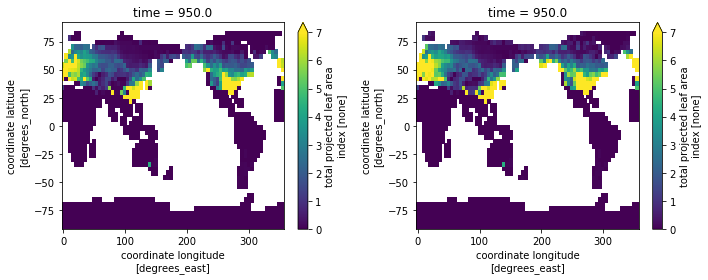

In [7]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
print(ds0.TLAI)
t=ds1.TLAI.sizes['time']-100
t=950-365
ds0.TLAI[t,:,:].plot(ax=ax0,vmax=7)
ds1.TLAI[t,:,:].plot(ax=ax1,vmax=7)
plt.tight_layout()


Let's look at the difference in LAI between these runs (in year three).

Broadly it is higher, but, given it's NH summer, I'm a bit worried about those South American points. 

<xarray.DataArray 'TLAI' (time: 730, lat: 46, lon: 72)>
dask.array<shape=(730, 46, 72), dtype=float32, chunksize=(365, 46, 72)>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * time     (time) float64 365.0 366.0 367.0 ... 1.092e+03 1.093e+03 1.094e+03
Attributes:
    long_name:     total projected leaf area index
    units:         none
    cell_methods:  time: mean


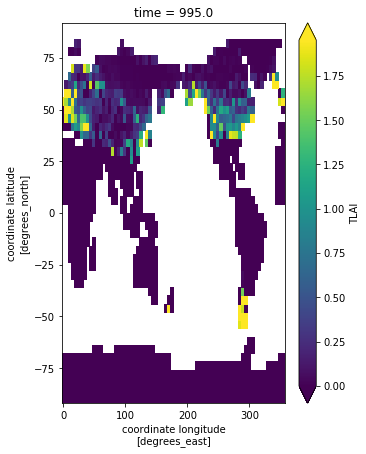

In [8]:
plt.rcParams['figure.figsize'] = [5, 7]
print(ds0.TLAI)
t=ds1.TLAI.sizes['time']-100
d=ds1.TLAI[t,:,:]-ds0.TLAI[t,:,:]
t=950-365
d.plot(robust=True)


Lets plot some LAI from South America...

Indeed, this alteration does seem to have changed the post-growing season leaf-out behaviour. 


<xarray.DataArray 'lat' (lat: 4)>
array([-58., -54., -50., -46.], dtype=float32)
Coordinates:
  * lat      (lat) float32 -58.0 -54.0 -50.0 -46.0
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north
<xarray.DataArray 'lon' (lon: 5)>
array([285., 290., 295., 300., 305.], dtype=float32)
Coordinates:
  * lon      (lon) float32 285.0 290.0 295.0 300.0 305.0
Attributes:
    long_name:  coordinate longitude
    units:      degrees_east


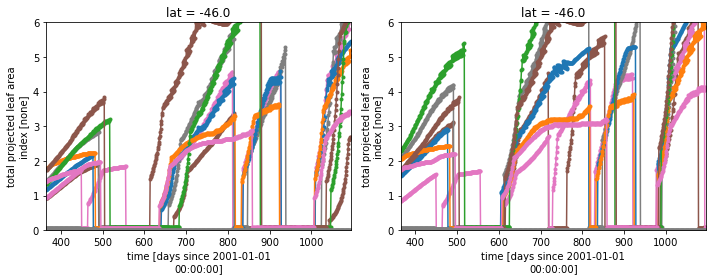

In [9]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
lats=range(8,12)
lons=range(57,62)
print(ds1.lat[lats])
print(ds1.lon[lons])
xmn=365*yr1
xmx=365*yr2
ymx=6
for l in lats:
   ds0.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
   ds1.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
plt.tight_layout()


Check also what is happeningi n  NE USA

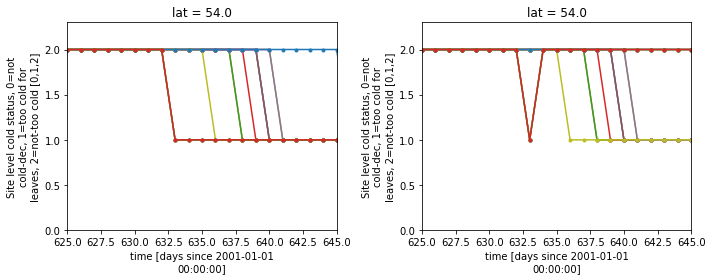

In [30]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
lats=range(36,37)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
xmn=625
xmx=645
ymx=2.3
for l in lats:
   ds0.SITE_COLD_STATUS.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
   ds1.SITE_COLD_STATUS.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
plt.tight_layout()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
lats=range(36,37)
lons=range(46,60)
print(ds1.lat[lats])
print(ds1.lon[lons])
xmn=365*yr1
xmx=365*yr2
ymx=6
for l in lats:
   ds0.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
   ds1.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
plt.tight_layout()

Illustrate carbon dynamics for NE US. For several places, there are examples of leafes coming off, and then going straight back on again...  

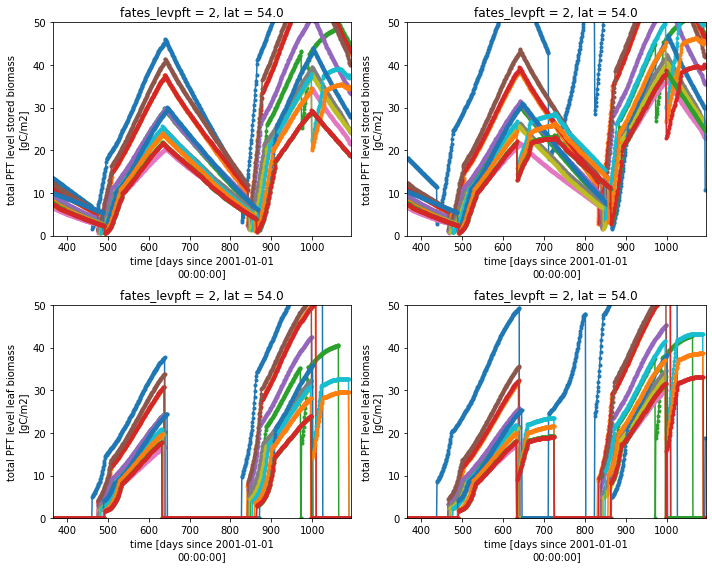

In [23]:
plt.rcParams['figure.figsize'] = [10, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,37)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=50
ymx2=50
for l in lats:
   ds0.PFTstorebiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), marker='.',ylim=(0,ymx))
   ds1.PFTstorebiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
   ds0.PFTleafbiomass.isel(lat=l,   lon=lons, fates_levpft=1).plot.line(ax=ax2,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx2))
   ds1.PFTleafbiomass.isel(lat=l,   lon=lons, fates_levpft=1).plot.line(ax=ax3,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx2))
plt.tight_layout()


If we look at the leafoff counter, however, things look at lot more sensible, so I am tempted to keep this change, and search for a different cause for the re-leafing issue.

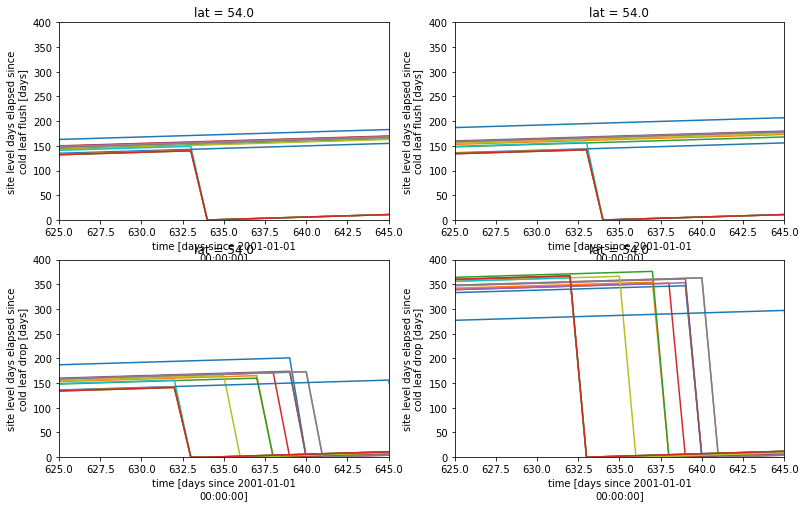

In [33]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,37)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=400
xmn=625
xmx=645
for l in lats:
   ds0.SITE_DAYSINCE_COLDLEAFON.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))
   ds0.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l,  lon=lons).plot.line(ax=ax2,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))


Here are the growing degree day counters. There are at least two issues here. 
1. We don't zero out GDD at budburst, and 
2. We continue to accumulate GDD's during the growing season, which is a little meaningless. 

Both of these things could in principle contribute to the re-leafing dynamics we see here.

Further, there should be differences in GDD triggered by the modification made in this iteration, because when we go through leaf-off, GDD is rezeroed, and in the second simulation here, we miss the second strange leaf-off event. 

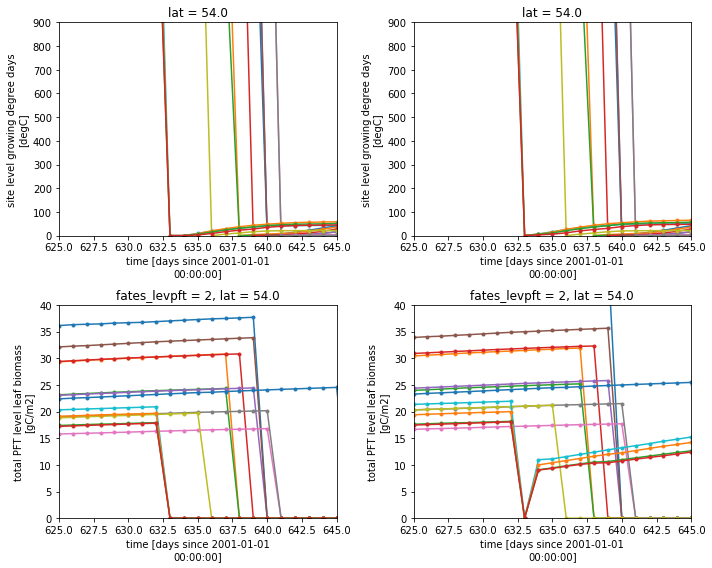

In [32]:
plt.rcParams['figure.figsize'] = [10, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,37)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=900
xmn=625
xmx=645
for l in lats:
   ds0.SITE_GDD.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds0.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax2,x='time',add_legend=False, xlim=(xmn,xmx), marker='.',ylim=(0,40))
   ds1.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax3,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,40))
plt.tight_layout()

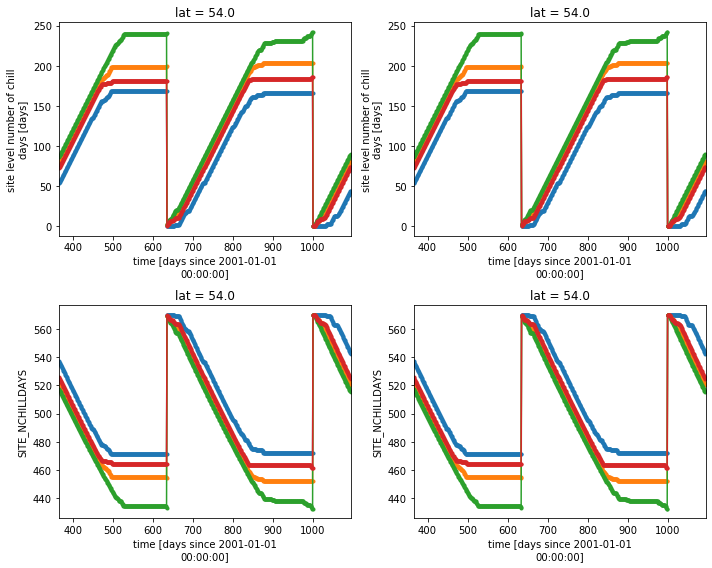

In [14]:
plt.rcParams['figure.figsize'] = [10, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,37)
lons=range(46,50)
xmn=365*yr1
xmx=365*yr2
ymx=900
a=-0.001 * ds0.SITE_NCHILLDAYS
b=-0.001 * ds1.SITE_NCHILLDAYS
gdd_th0=-68 + 638*np.exp(a)
gdd_th1=-68 + 638*np.exp(b)
for l in lats:
   ds0.SITE_NCHILLDAYS.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   ds1.SITE_NCHILLDAYS.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   gdd_th0.isel(lat=l,  lon=lons).plot.line(ax=ax2,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   gdd_th1.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, marker='.', xlim=(xmn,xmx)) 
plt.tight_layout()

In [16]:
ds0.SITE_NCHILLDAYS.isel(lat=l,  lon=lons)


<xarray.DataArray 'SITE_NCHILLDAYS' (time: 730, lon: 4)>
dask.array<shape=(730, 4), dtype=float32, chunksize=(365, 4)>
Coordinates:
  * lon      (lon) float32 230.0 235.0 240.0 245.0
    lat      float32 54.0
  * time     (time) float64 365.0 366.0 367.0 ... 1.092e+03 1.093e+03 1.094e+03
Attributes:
    long_name:     site level number of chill days
    units:         days
    cell_methods:  time: mean